In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from datetime import datetime
from scipy.spatial import distance
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR, SVC
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# dataset path 
eq_path = 'datasets/EQ 1965 to 2016.xlsx'
tectonic_Plates_path = 'datasets/Tectonic Plates Datasets.xlsx'

In [ ]:
# load data in pandas dataframe 
earthquake_data = pd.read_excel(eq_path)
tectonic_plate_data = pd.read_excel(tectonic_Plates_path)

In [ ]:
# set the display options to show all columns
pd.set_option('display.max_columns', None)

In [ ]:
# display first 5 records of earthquake data 
earthquake_data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,1965-01-02 00:00:00+00:00,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1965-01-04 00:00:00+00:00,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1965-01-05 00:00:00+00:00,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1965-01-08 00:00:00+00:00,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1965-01-09 00:00:00+00:00,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [ ]:
# display first five records of tectonic plates data 
tectonic_plate_data.head()

,plate,lat,lon
0,am,30.754,132.824
1,am,30.970,132.965
2,am,31.216,133.197
3,am,31.515,133.500
4,am,31.882,134.042


In [ ]:
# print total number of records in both the dataset 
print('Total records in earthquake dataset : ', earthquake_data.shape[0])
print('Total records in tectonic plate dataset : ', earthquake_data.shape[0])

Total records in earthquake dataset :  23412
Total records in tectonic plate dataset :  23412


In [ ]:
# display informaton of earthquake data 
earthquake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   Date                        23412 non-null  datetime64[ns, UTC]
 1   Time                        23412 non-null  object             
 2   Latitude                    23412 non-null  float64            
 3   Longitude                   23412 non-null  float64            
 4   Type                        23412 non-null  object             
 5   Depth                       23412 non-null  float64            
 6   Depth Error                 4461 non-null   float64            
 7   Depth Seismic Stations      7097 non-null   float64            
 8   Magnitude                   23412 non-null  float64            
 9   Magnitude Type              23409 non-null  object             
 10  Magnitude Error             327 non-null    float64       

In [ ]:
tectonic_plate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12321 entries, 0 to 12320
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   plate   12321 non-null  object 
 1   lat     12321 non-null  float64
 2   lon     12321 non-null  float64
dtypes: float64(2), object(1)
memory usage: 288.9+ KB


# Data PreProcessing 

In [ ]:
# dropping columns with missing values
if earthquake_data.isnull().values.any():
    # drop any columns with missing values
    eq_data = earthquake_data.dropna(axis=1)

In [ ]:
# we add these 'Magnitude Type' because in this column have only three missing value 
# Group the data by 'Magnitude'
grouped = earthquake_data.groupby('Magnitude')

# Define a function to impute missing values in a series based on the most frequent value
def impute_most_frequent(series):
    most_frequent = series.mode().iloc[0]
    return series.fillna(most_frequent)

# Apply the imputation function to the 'Magnitude Type' column for each group
eq_data['Magnitude Type'] = grouped['Magnitude Type'].apply(impute_most_frequent)

In [ ]:
# display first five records
eq_data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,ID,Source,Location Source,Magnitude Source,Status,Magnitude Type
0,1965-01-02 00:00:00+00:00,13:44:18,19.246,145.616,Earthquake,131.6,6.0,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,MW
1,1965-01-04 00:00:00+00:00,11:29:49,1.863,127.352,Earthquake,80.0,5.8,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,MW
2,1965-01-05 00:00:00+00:00,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,MW
3,1965-01-08 00:00:00+00:00,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,MW
4,1965-01-09 00:00:00+00:00,13:32:50,11.938,126.427,Earthquake,15.0,5.8,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,MW


In [ ]:
eq_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Date              23412 non-null  datetime64[ns, UTC]
 1   Time              23412 non-null  object             
 2   Latitude          23412 non-null  float64            
 3   Longitude         23412 non-null  float64            
 4   Type              23412 non-null  object             
 5   Depth             23412 non-null  float64            
 6   Magnitude         23412 non-null  float64            
 7   ID                23412 non-null  object             
 8   Source            23412 non-null  object             
 9   Location Source   23412 non-null  object             
 10  Magnitude Source  23412 non-null  object             
 11  Status            23412 non-null  object             
 12  Magnitude Type    23412 non-null  object             
dtypes

In [ ]:
# check for incorrect dates
try:
    pd.to_datetime(eq_data['Date'])
    print("No incorrect dates found.")
except ValueError as e:
    print(f"Error: {e}")

No incorrect dates found.


In [ ]:
#exploring the length of date objects
lengths = eq_data["Date"].astype(str).str.len()
lengths.value_counts()

25    23410
32        2
Name: Date, dtype: int64

In [ ]:
#having a look at the fishy datapoints
incorrect_dates = np.where([lengths == 32])[1]
print("Fishy dates:", incorrect_dates)
eq_data.loc[incorrect_dates]

Fishy dates: [ 7512 20650]


,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,ID,Source,Location Source,Magnitude Source,Status,Magnitude Type
7512,1985-04-28 02:53:41.530000+00:00,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,5.6,USP0002E81,US,US,HRV,Reviewed,MW
20650,2011-03-13 02:23:34.520000+00:00,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,5.8,USP000HWQP,US,US,GCMT,Reviewed,MWC


Based on our analysis, the "date" column appears to have the correct format, so no changes are needed.


In [ ]:
# Date 
eq_data['Year'] = eq_data['Date'].dt.year
eq_data['Month'] = eq_data['Date'].dt.month
eq_data['Day'] = eq_data['Date'].dt.day

In [ ]:
  #exploring the length of date objects
lengths = eq_data["Time"].astype(str).str.len()
lengths.value_counts()

8     23409
24        3
Name: Time, dtype: int64

In [ ]:
#Having a look at the fishy datapoints
incorrect_time = np.where([lengths == 24])[1]
print("Fishy time:", incorrect_time)
eq_data.loc[incorrect_time]

Fishy time: [ 3378  7512 20650]


,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,ID,Source,Location Source,Magnitude Source,Status,Magnitude Type,Year,Month,Day
3378,1975-02-23 02:58:41+00:00,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,5.6,USP0000A09,US,US,US,Reviewed,MB,1975,2,23
7512,1985-04-28 02:53:41.530000+00:00,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,5.6,USP0002E81,US,US,HRV,Reviewed,MW,1985,4,28
20650,2011-03-13 02:23:34.520000+00:00,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,5.8,USP000HWQP,US,US,GCMT,Reviewed,MWC,2011,3,13


In [ ]:
# Convert Time column to string type
eq_data['Time'] = eq_data['Time'].astype(str)

In [ ]:
#fixing the wrong time and changing the datatype from numpy object to timedelta64[ns]
eq_data.loc[3378, "Time"] = "02:58:41"
eq_data.loc[7512, "Time"] = "02:53:41"
eq_data.loc[20650, "Time"] = "02:23:34"

In [ ]:
# convert time delta 
eq_data['Time_']= pd.to_timedelta(eq_data['Time'])

In [ ]:
# Convert the time column to datetime format
eq_data['Time'] = pd.to_datetime(eq_data['Time'])

In [ ]:
# Extract the hour, minute, and second from the time column
eq_data['Hour'] = eq_data['Time'].dt.hour
eq_data['Minute'] = eq_data['Time'].dt.minute
eq_data['Second'] = eq_data['Time'].dt.second

In [ ]:
# Create data and time column 
eq_data["Date_Time"]=eq_data["Date"] +eq_data["Time_"]

# Lable Encoding 

In [ ]:
from sklearn.preprocessing import LabelEncoder

# define LabelEncoder object
le = LabelEncoder()

# encode categorical columns to numerical
eq_data['Type'] = le.fit_transform(eq_data['Type'])
eq_data['Source'] = le.fit_transform(eq_data['Source'])
eq_data['Location Source'] = le.fit_transform(eq_data['Location Source'])
eq_data['Status'] = le.fit_transform(eq_data['Status'])
eq_data['Magnitude Type'] = le.fit_transform(eq_data['Status'])

In [ ]:
# convert integer value to string 
eq_data['Magnitude Source'] = eq_data['Magnitude Source'].astype(str)

In [ ]:
# label encoder 
eq_data['Magnitude Source'] = le.fit_transform(eq_data['Magnitude Source'])

In [ ]:
eq_data.head(2)

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,ID,Source,Location Source,Magnitude Source,Status,Magnitude Type,Year,Month,Day,Time_,Hour,Minute,Second,Date_Time
0,1965-01-02 00:00:00+00:00,2023-04-21 13:44:18,19.246,145.616,0,131.6,6.0,ISCGEM860706,4,20,11,0,0,1965,1,2,0 days 13:44:18,13,44,18,1965-01-02 13:44:18+00:00
1,1965-01-04 00:00:00+00:00,2023-04-21 11:29:49,1.863,127.352,0,80.0,5.8,ISCGEM860737,4,20,11,0,0,1965,1,4,0 days 11:29:49,11,29,49,1965-01-04 11:29:49+00:00


# Train Test Split for "Magnitude" Prediction

In [ ]:
X = eq_data.drop(['Date','Time','ID','Magnitude','Time_','Date_Time'], axis=1)
y = eq_data['Magnitude']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector Machines (SVM) for earthquake "Magnitude" prediction

In [ ]:
# Fit the SVM model
svm = SVR(kernel='linear')
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.5325117096892648


# Long Short-Term Memory (LSTM) for earthquake "Magnitude" prediction

In [ ]:
# Normalize the feature data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the feature data to be 3-dimensional
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score)

Epoch 1/10
469/469 [==============================] - 6s 7ms/step - loss: 2.5122 - val_loss: 0.2774
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2034 - val_loss: 0.1931
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1854 - val_loss: 0.1883
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1841 - val_loss: 0.1853
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1831 - val_loss: 0.1819
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1805 - val_loss: 0.1845
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1810 - val_loss: 0.2470
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1831 - val_loss: 0.1844
Epoch 9/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1799 - val_loss: 0.1805
Epoch 10/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1796 - val_loss: 0.1805

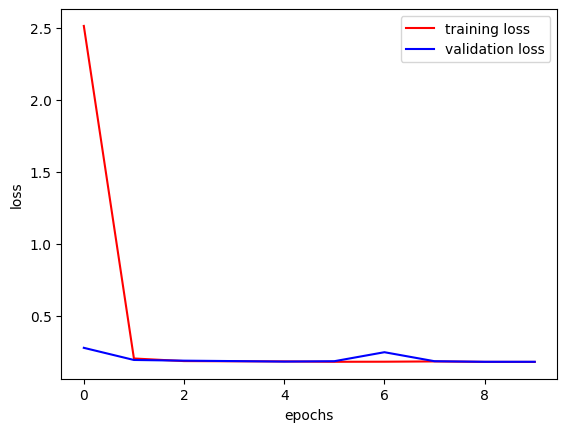

In [ ]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],'b',label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Train Test Split for "Location Source" Prediction

In [ ]:
X = eq_data.drop(['Date','Time','ID','Location Source','Time_','Date_Time'], axis=1)
y = eq_data['Location Source']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector Machines (SVM) for earthquake "Location Source" prediction

In [ ]:
# Initialize an SVM model
svm_model = SVC(kernel='rbf', gamma='auto')

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Predict on the test data
y_pred = svm_model.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 87.72%


# Long Short-Term Memory (LSTM) for earthquake "Location Source" prediction

In [ ]:
# MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Reshape the data for LSTM
# Reshape the feature data to be 3-dimensional
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
# Initialize an LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(1, X_train.shape[2]), activation='relu', return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(32, activation='relu'))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(48, activation='softmax'))

# Compile the model
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
history = lstm_model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=32)

# Predict on the test data
y_pred_prob = lstm_model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Epoch 1/5
469/469 [==============================] - 6s 6ms/step - loss: 0.7460 - accuracy: 0.9315 - val_loss: 0.1603 - val_accuracy: 0.9794
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1677 - accuracy: 0.9786 - val_loss: 0.1499 - val_accuracy: 0.9794
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1483 - accuracy: 0.9786 - val_loss: 0.1463 - val_accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1427 - accuracy: 0.9786 - val_loss: 0.1313 - val_accuracy: 0.9794
Epoch 5/5
147/147 [==============================] - 1s 3ms/step
Accuracy: 0.9822763185991885


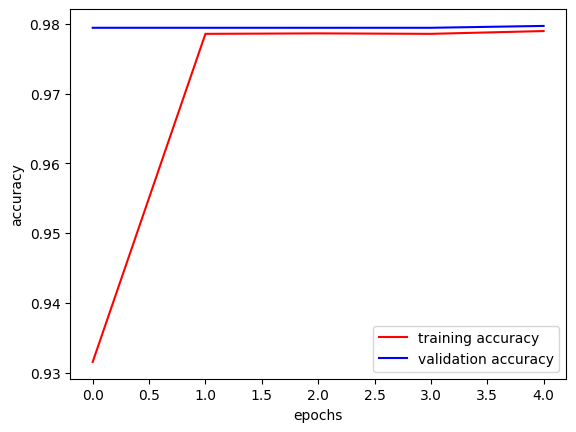

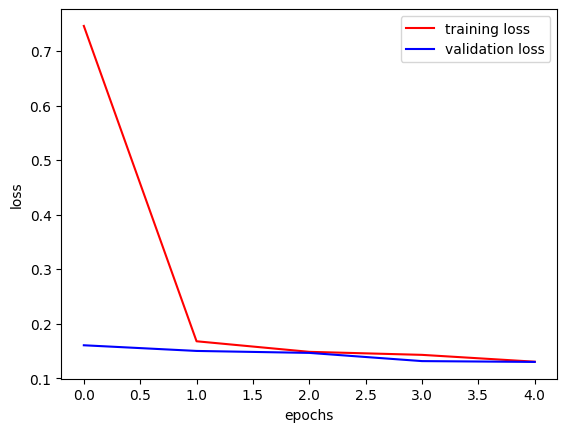

In [ ]:
import matplotlib.pyplot as plt
# Plot graph
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],'b',label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],'b',label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Train Test Split for "Time" Prediction 

In [ ]:
#X = eq_data[['Latitude','Longitude','Depth','Magnitude']]
X = eq_data.drop(['Date','Time','ID','Time_','Date_Time','Hour','Minute','Second','Year','Month','Day'], axis=1)
y = pd.to_datetime(eq_data['Date_Time'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Convert the Timestamp objects to seconds since the Unix epoch
y_train = y_train.astype('int64') // 10**9
y_test = y_test.astype('int64') // 10**9

# Support Vector Machines (SVM) for earthquake "Time" prediction

In [ ]:
# Fit the SVM model
svm = SVR(kernel='linear')
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Compute the root mean squared error (RMSE) of the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))

Mean Squared Error: 2.0544113289145782e+17
Root Mean Squared Error (RMSE): 453256144.90


# Long Short-Term Memory (LSTM) for earthquake "Time" prediction

In [ ]:
# MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Reshape the data for LSTM
# Reshape the feature data to be 3-dimensional
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score)

Epoch 1/10
469/469 [==============================] - 6s 7ms/step - loss: 737626548227538944.0000 - val_loss: 758186384874799104.0000
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 737621119388876800.0000 - val_loss: 758178344696020992.0000
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 737611223784226816.0000 - val_loss: 758167005982359552.0000
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 737597754766786560.0000 - val_loss: 758151956416954368.0000
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 737582086726090752.0000 - val_loss: 758133745755619328.0000
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 737562707833651200.0000 - val_loss: 758112855034691584.0000
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 737540855040049152.0000 - val_loss: 758089559132078080.0000
Epoch 8/10
469/469 [==============================] - 3s 6ms/s

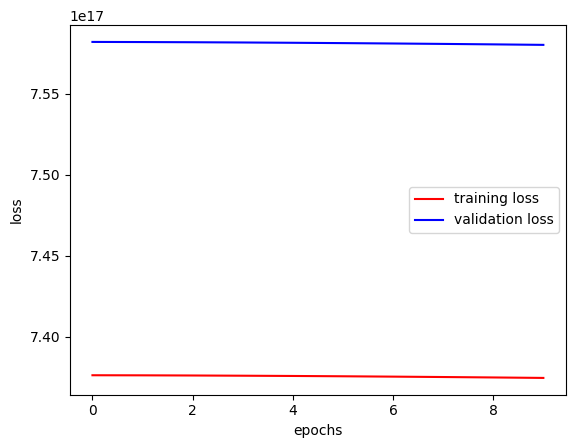

In [ ]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],'b',label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Merge Dataset 

In [ ]:
from scipy.spatial import KDTree

# assume eq_data1 and eq_data2 are the two earthquake datasets
tree = KDTree(tectonic_plate_data[['lat', 'lon']])

# find the index of the closest point in eq_data2 for each point in eq_data1
distances, indices = tree.query(eq_data[['Latitude', 'Longitude']], k=1)

# merge the two datasets based on the indices
combine_data = pd.concat([eq_data.reset_index(drop=True), tectonic_plate_data.loc[indices].reset_index(drop=True)], axis=1)

# Label encoding 

In [ ]:
# encode categorical columns to numerical
combine_data['plate'] = le.fit_transform(combine_data['plate'])

# Train Test Split for "Magnitude" Prediction after Merge Dataset 

In [ ]:
X = eq_data.drop(['Date','Time','ID','Magnitude',"Time_","Date_Time"], axis=1)
y = eq_data['Magnitude']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector Machines (SVM) for earthquake "Magnitude" prediction

In [ ]:
# Fit the SVM model
svm = SVR(kernel='linear')
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Compute the root mean squared error (RMSE) of the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))

Mean Squared Error: 0.5325117096892648
Root Mean Squared Error (RMSE): 0.73


# Long Short-Term Memory (LSTM) for earthquake "Magnitude" prediction after Merge Dataset 

In [ ]:
# Normalize the feature data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the feature data to be 3-dimensional
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score)

Epoch 1/10
469/469 [==============================] - 8s 9ms/step - loss: 2.2473 - val_loss: 0.2396
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1951 - val_loss: 0.1890
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1833 - val_loss: 0.1912
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1822 - val_loss: 0.1911
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1819 - val_loss: 0.1897
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1825 - val_loss: 0.1887
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1815 - val_loss: 0.2142
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1814 - val_loss: 0.1884
Epoch 9/10
469/469 [==============================] - 4s 10ms/step - loss: 0.1809 - val_loss: 0.1845
Epoch 10/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1818 - val_loss: 0.204

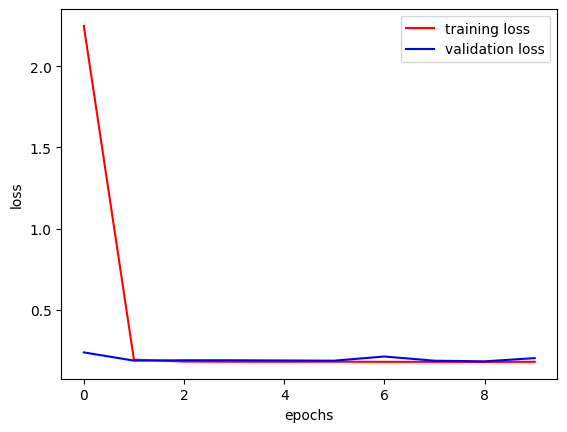

In [ ]:
# plot 
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],'b',label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Train Test Split for "Location Source" Prediction After Merge Dataset 

In [ ]:
X = eq_data.drop(['Date','Time','ID','Location Source',"Time_","Date_Time"], axis=1)
y = eq_data['Location Source']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector Machines (SVM) for earthquake "Location Source" prediction

---



In [ ]:
# Initialize an SVM model
svm_model = SVC(kernel='rbf', gamma='auto')

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Predict on the test data
y_pred = svm_model.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 87.72%


# Long Short-Term Memory (LSTM) for earthquake "Location Source" prediction After Merge Dataset 

In [ ]:
# MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Reshape the data for LSTM
# Reshape the feature data to be 3-dimensional
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
# Initialize an LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(1, X_train.shape[2]), activation='relu', return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(32, activation='relu'))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(48, activation='softmax'))

# Compile the model
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
history = lstm_model.fit(X_train, y_train,  validation_split=0.2, epochs=5, batch_size=32)

# Predict on the test data
y_pred_prob = lstm_model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Epoch 1/5
469/469 [==============================] - 17s 15ms/step - loss: 0.7179 - accuracy: 0.9351 - val_loss: 0.1628 - val_accuracy: 0.9794
Epoch 2/5
469/469 [==============================] - 7s 14ms/step - loss: 0.1661 - accuracy: 0.9786 - val_loss: 0.1444 - val_accuracy: 0.9794
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1496 - accuracy: 0.9787 - val_loss: 0.1341 - val_accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1419 - accuracy: 0.9786 - val_loss: 0.1291 - val_accuracy: 0.9794
Epoch 5/5
147/147 [==============================] - 1s 3ms/step
Accuracy: 0.9824898569293188


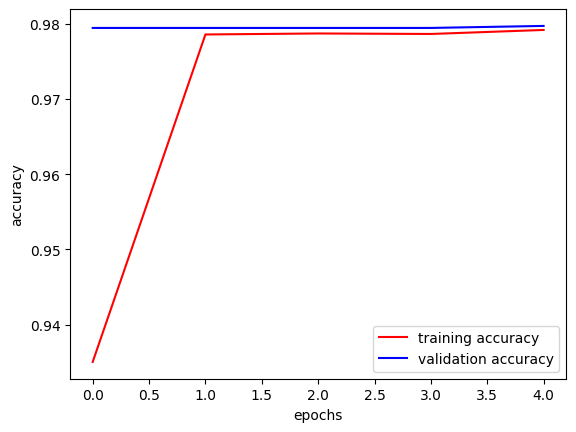

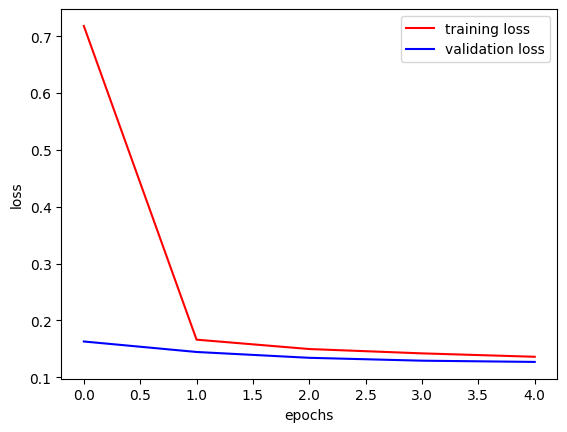

In [ ]:
import matplotlib.pyplot as plt
# Plot graph
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],'b',label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],'b',label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Train Test Split for "Time" Prediction after Merge data

In [ ]:
X = eq_data.drop(['Date','Time','ID','Time_','Date_Time','Hour','Minute','Second','Year','Month','Day'], axis=1)
y = pd.to_datetime(eq_data['Date_Time'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Convert the Timestamp objects to seconds since the Unix epoch
y_train = y_train.astype('int64') // 10**9
y_test = y_test.astype('int64') // 10**9

# Support Vector Machines (SVM) for earthquake "Time" prediction After Merge Data

In [ ]:
# Fit the SVM model
svm = SVR(kernel='linear')
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Compute the root mean squared error (RMSE) of the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))

Mean Squared Error: 2.0544113289145782e+17
Root Mean Squared Error (RMSE): 453256144.90


# Long Short-Term Memory (LSTM) for earthquake "Time" prediction after Merge data

In [ ]:
# MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Reshape the data for LSTM
# Reshape the feature data to be 3-dimensional
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score)

Epoch 1/10
469/469 [==============================] - 9s 11ms/step - loss: 737626479508062208.0000 - val_loss: 758186384874799104.0000
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 737621050669400064.0000 - val_loss: 758178344696020992.0000
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 737610811467366400.0000 - val_loss: 758167005982359552.0000
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 737597960925216768.0000 - val_loss: 758151956416954368.0000
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 737581330811846656.0000 - val_loss: 758133745755619328.0000
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 737562776553127936.0000 - val_loss: 758112923754168320.0000
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 737540923759525888.0000 - val_loss: 758089765290508288.0000
Epoch 8/10
469/469 [==============================] - 4s 8m

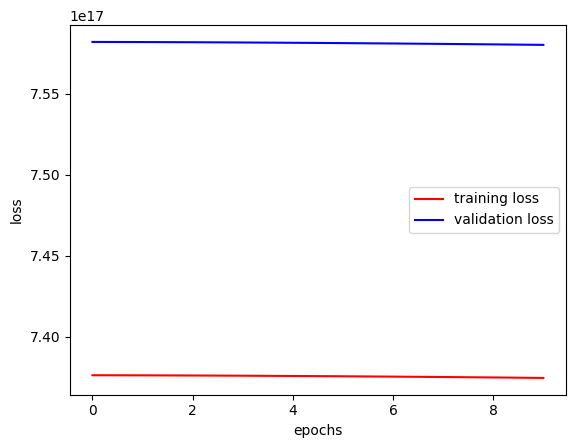

In [ ]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],'b',label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Creating a column "Has Aftershock" based on the information of earthquake magnitude, time and distance windows.

In [ ]:
from scipy.spatial.distance import cdist

# Set threshold and time/distance windows
magnitude_threshold = 4.0
time_window = pd.Timedelta(days=3)
distance_window = 100  # in kilometers

# Calculate pairwise distances between earthquakes
distances = cdist(combine_data[['Latitude', 'Longitude']], combine_data[['lat', 'lon']])

# Find the indices of earthquakes that have an aftershock within the time and distance windows
has_aftershock = np.zeros(len(combine_data), dtype=bool)
for i in range(len(combine_data)):
    aftershocks = np.where((distances[i] <= distance_window) & 
                           (combine_data['Magnitude'] > magnitude_threshold) & 
                           (combine_data['Date_Time'] > combine_data.loc[i, 'Date_Time']) & 
                           (combine_data['Date_Time'] <= combine_data.loc[i, 'Date_Time'] + time_window))[0]
    if len(aftershocks) > 0:
        has_aftershock[i] = True
        
# Add a column to the dataframe indicating whether each earthquake has an aftershock or not
combine_data['Has Aftershock'] = has_aftershock.astype(int)


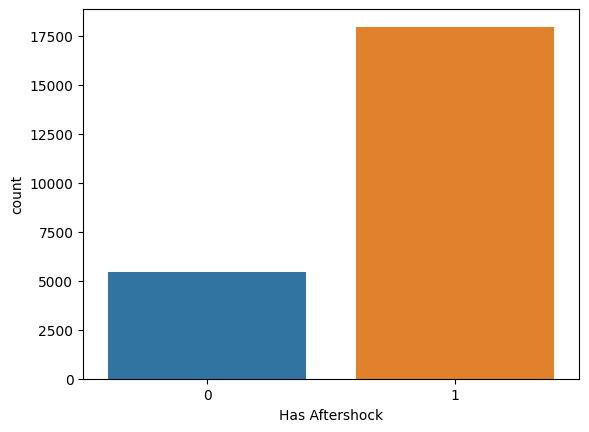

In [ ]:
# Create a count plot
sns.countplot(x=combine_data['Has Aftershock'])

# Show the plot
plt.show()

# Train Test Split for "Aftershock" Prediction 

In [ ]:
X = combine_data.drop(['Date','Time','ID',"Time_","Date_Time"], axis=1)
y = combine_data['Has Aftershock']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

# Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# svm model
svm_model = SVC(kernel='rbf', gamma='auto')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Long Short-Term Memory (LSTM) for earthquake "Has Aftershock" prediction

In [ ]:
# MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Reshape the data for LSTM
# Reshape the feature data to be 3-dimensional
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
# Initialize an LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(1, X_train.shape[2]), activation='relu', return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(32, activation='relu'))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
history = lstm_model.fit(X_train, y_train,  validation_split=0.2, epochs=5, batch_size=32)

# Predict on the test data
y_pred_prob = lstm_model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

Epoch 1/5
469/469 [==============================] - 6s 7ms/step - loss: 0.1614 - accuracy: 0.9317 - val_loss: 4.9586e-04 - val_accuracy: 1.0000
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 6.7717e-04 - accuracy: 1.0000 - val_loss: 4.2389e-05 - val_accuracy: 1.0000
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 1.2464e-04 - accuracy: 1.0000 - val_loss: 1.1717e-05 - val_accuracy: 1.0000
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 5.6738e-05 - accuracy: 1.0000 - val_loss: 5.8694e-06 - val_accuracy: 1.0000
Epoch 5/5
147/147 [==============================] - 1s 2ms/step


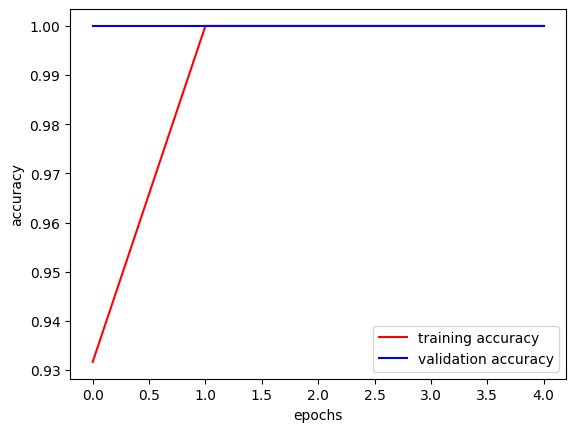

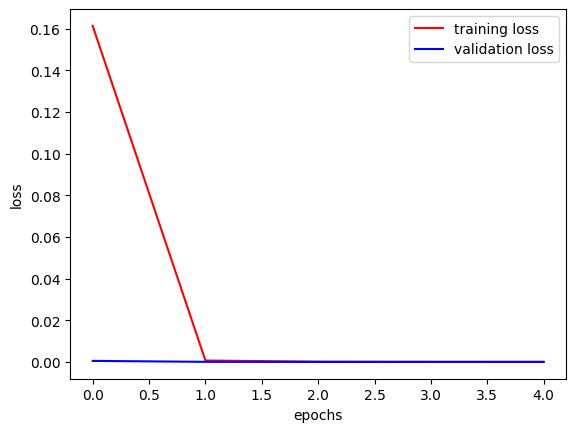

In [ ]:
import matplotlib.pyplot as plt
# Plot graph
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],'b',label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],'b',label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
# Compare the accuracies of all models
print("Logistic Regression Accuracy:", accuracy_logreg)
print("Random Forest Accuracy:", accuracy_rf)
print("Decision Tree Accuracy:", accuracy_dt)
print("Naive Bayes Accuracy:", accuracy_nb)
print("KNN Accuracy:", accuracy_knn)
print("SVM Accuracy:", accuracy_svm)
print('LSTM Accuracy:', accuracy)

Logistic Regression Accuracy: 0.7945761264146914
Random Forest Accuracy: 1.0
Decision Tree Accuracy: 1.0
Naive Bayes Accuracy: 1.0
KNN Accuracy: 0.7467435404655136
SVM Accuracy: 0.7616912235746316
LSTM Accuracy: 0.23830877642536835
